<a href="https://colab.research.google.com/github/Joycechidi/Secure-and-Private-AI/blob/master/saving_n_loading_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Saving and Loading Models

In [0]:
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/helper.py
!wget https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/fc_model.py

--2019-06-12 04:50:02--  https://github.com/udacity/deep-learning-v2-pytorch/raw/master/intro-to-pytorch/helper.py
Resolving github.com (github.com)... 192.30.253.112
Connecting to github.com (github.com)|192.30.253.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py [following]
--2019-06-12 04:50:03--  https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/intro-to-pytorch/helper.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2813 (2.7K) [text/plain]
Saving to: ‘helper.py.2’

helper.py.2         100%[===================>]   2.75K  --.-KB/s    in 0s      

2019-06-12 04:50:03 (49.8 MB/s) - ‘helper.py.2’ saved [

In [0]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt

import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
from torchvision import datasets, transforms

import helper
import fc_model

In [0]:
# Define a transform to normalize the data
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5,), (0.5,))])
# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

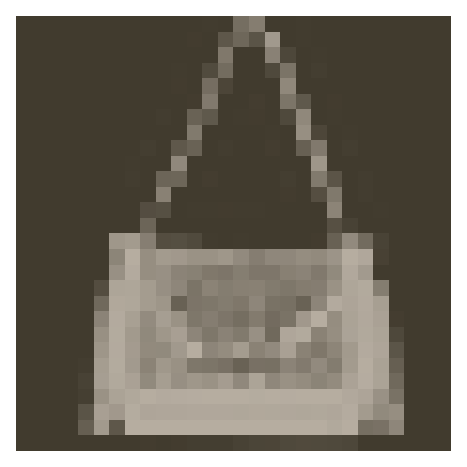

In [0]:
#Let's view one image
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);

# Train a Network

In [0]:
# Create the network, define the criterion and optimizer
# input_neurons = 784
# output_neurons = 10  #output layer here is log softmax
# 3 hidden_layers
# h1 = 512
# h2 = 256
# h3 = 128

model = fc_model.Network(784, 10, [512, 256, 128])
criterion = nn.NLLLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [0]:

fc_model.train(model, trainloader, testloader, criterion, optimizer, epochs=2)

Epoch: 1/2..  Training Loss: 1.699..  Test Loss: 0.991..  Test Accuracy: 0.596
Epoch: 1/2..  Training Loss: 1.049..  Test Loss: 0.730..  Test Accuracy: 0.727
Epoch: 1/2..  Training Loss: 0.846..  Test Loss: 0.688..  Test Accuracy: 0.743
Epoch: 1/2..  Training Loss: 0.748..  Test Loss: 0.649..  Test Accuracy: 0.755
Epoch: 1/2..  Training Loss: 0.748..  Test Loss: 0.615..  Test Accuracy: 0.770
Epoch: 1/2..  Training Loss: 0.743..  Test Loss: 0.601..  Test Accuracy: 0.768
Epoch: 1/2..  Training Loss: 0.699..  Test Loss: 0.605..  Test Accuracy: 0.769
Epoch: 1/2..  Training Loss: 0.691..  Test Loss: 0.577..  Test Accuracy: 0.787
Epoch: 1/2..  Training Loss: 0.714..  Test Loss: 0.560..  Test Accuracy: 0.790
Epoch: 1/2..  Training Loss: 0.697..  Test Loss: 0.542..  Test Accuracy: 0.802
Epoch: 1/2..  Training Loss: 0.619..  Test Loss: 0.554..  Test Accuracy: 0.799
Epoch: 1/2..  Training Loss: 0.632..  Test Loss: 0.540..  Test Accuracy: 0.800
Epoch: 1/2..  Training Loss: 0.632..  Test Loss: 0.5

# Saving and loading networks

it's impractical to train a network every time you need to use it. Instead, we can save trained networks then load them later to train more or use them for predictions.

The parameters for PyTorch networks are stored in a model's state_dict. We can see the state dict contains the weight and bias matrices for each of our layers.

In [0]:
print("Our model: \n\n", model, '\n')
print("The state dict keys: \n\n", model.state_dict().keys())

Our model: 

 Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
) 

The state dict keys: 

 odict_keys(['hidden_layers.0.weight', 'hidden_layers.0.bias', 'hidden_layers.1.weight', 'hidden_layers.1.bias', 'hidden_layers.2.weight', 'hidden_layers.2.bias', 'output.weight', 'output.bias'])


The simplest thing to do is simply save the state dict with torch.save. For example, we can save it to a file 'checkpoint.pth'.

In [0]:
#I'll rebuild the model exactly how it was when being trained to eliminate size mismatch
#The information about the model architecture needs to be saved in the 
#checkpoint along with the state dict.

#To do this, I will build a dictionary with all the information needed to completely
#rebuild the model. 

checkpoint = {'input_size': 784,
             'output_size':10,
             'hidden_layers': [each.out_features for each in model.hidden_layers],
             'state_dict': model.state_dict()}



torch.save(checkpoint, 'checkpoint.pth')

The checkpoint now has all the necessary information to rebuild the the trained model.
I'll make that a function. Then another function to load the checkpoints

In [0]:
def load_checkpoint(filepath):
  checkpoint = torch.load(filepath)
  model = fc_model.Network(checkpoint['input_size'],
                          checkpoint['output_size'],
                          checkpoint['hidden_layers'])
  model.load_state_dict(checkpoint['state_dict'])
  return model

In [0]:
model = load_checkpoint('checkpoint.pth')
print(model)

Network(
  (hidden_layers): ModuleList(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): Linear(in_features=512, out_features=256, bias=True)
    (2): Linear(in_features=256, out_features=128, bias=True)
  )
  (output): Linear(in_features=128, out_features=10, bias=True)
  (dropout): Dropout(p=0.5)
)


We can load the statewith torch.load. And to load the state dict in to the network, you do model.load_state_dict(state_dict).

In [0]:
# #state_dict = torch.load('checkpoint.pth')
# print(state_dict.keys())

dict_keys(['input_size', 'output_size', 'hidden_layers', 'state_dict'])


Seems pretty straightforward, but as usual it's a bit more complicated. Loading the state dict works only if the model architecture is exactly the same as the checkpoint architecture. If I create a model with a different architecture, this fails

In [0]:
# # Try this
# model = fc_model.Network(784, 10, [400, 200, 100])
# # This will throw an error because the tensor sizes are wrong!
# model.load_state_dict(state_dict)

This means we need to rebuild the model exactly as it was when trained. Information about the model architecture needs to be saved in the checkpoint, along with the state dict. To do this, you build a dictionary with all the information you need to compeletely rebuild the model.

In [0]:
# checkpoint = {'input_size': 784,
#               'output_size': 10,
#               'hidden_layers': [each.out_features for each in model.hidden_layers],
#               'state_dict': model.state_dict()}

# torch.save(checkpoint, 'checkpoint.pth')